In [1]:
import csv
import pandas as pd
import requests
import os
from collections import defaultdict
from datetime import timedelta
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas
import matplotlib

/home/gautam/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data=pd.read_csv("../dataset/pred_time.csv")

In [3]:
df=data[data["since_prev_break"]!=float('inf')]
df
#"break_date","InstallYear_2"

,Unnamed: 0,FacilityID,InstallYear,Diameter,break_date,CI,SPUN,SAND,DI,InstallYear_2,break_date_2,since_prev_break,prior_breaks
0,0,MAIN-6943-13636,1969,6.0,1997-01-02,0,0,0,1,1969-01-01,-8435.0,10228.0,0.0
1,1,MAIN-6336-18809,1959,8.0,1997-02-04,1,0,0,0,1959-01-01,-8402.0,13914.0,0.0
2,2,MAIN-5744-15604,1917,10.0,1997-10-08,0,0,1,0,1917-01-01,-8156.0,29500.0,0.0
3,3,MAIN-3749-6440,1950,6.0,1998-08-01,0,1,0,0,1950-01-01,-7859.0,17744.0,0.0
4,4,MAIN-6860-16497,1966,8.0,1998-08-21,1,0,0,0,1966-01-01,-7839.0,11920.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,3400,MAIN-2853-3313,1965,10.0,2019-09-25,1,0,0,0,1965-01-01,-134.0,19990.0,0.0
3401,3401,MAIN-4949-5931,2006,6.0,2019-09-28,0,0,0,1,2006-01-01,-131.0,5018.0,0.0
3402,3402,MAIN-2859-4488,1995,10.0,2019-10-02,0,0,0,1,1995-01-01,-127.0,2108.0,1.0
3403,3403,MAIN-6729-19170,1970,12.0,2019-10-06,0,0,0,1,1970-01-01,-123.0,18175.0,0.0


In [4]:
xcols = ["prior_breaks", "InstallYear","Diameter","CI","SPUN","SAND","DI","break_date_2"]
ycol = "since_prev_break"

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[xcols], df[ycol], test_size=0.1)

In [6]:
from sklearn import linear_model
import numpy as np                   
    
clf=linear_model.Ridge(alpha=0.01)
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)

prediction[prediction<0]=0

In [7]:
##Now retrain on the entire set and formulate predictions

In [8]:
clf2=linear_model.Ridge(alpha=0.01)
clf2.fit(df[xcols], df[ycol])
data=data.fillna(0)
prediction2=clf2.predict(data[xcols])

In [9]:
data=data.replace(float('inf'), np.nan)
data=data.fillna(0)
data["Predict"]=round(prediction2-data["since_prev_break"])/365
data[data["Predict"]<0]=0

In [10]:
wm = geopandas.read_file("zip://../dataset/WaterMains.zip")
wm

,OBJECTID,FacilityID,InstallYea,LifecycleS,Diameter,Material,Bagged,LiningType,Shape_STLe,geometry
0,1,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,3.646795,"LINESTRING (818246.809 465305.287, 818250.456 ..."
1,2,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,3.500123,"LINESTRING (818250.645 465308.776, 818250.456 ..."
2,3,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,3.499850,"LINESTRING (819023.477 465921.541, 819025.375 ..."
3,4,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,7.648740,"LINESTRING (819025.375 465918.600, 819032.423 ..."
4,5,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,1127.874973,"LINESTRING (818330.485 465303.820, 818346.420 ..."
...,...,...,...,...,...,...,...,...,...,...
22515,419693,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,111.669489,"LINESTRING (773693.791 484574.175, 773693.674 ..."
22516,419694,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,831.525282,"LINESTRING (773691.327 484690.979, 773691.253 ..."
22517,420093,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,38.955988,"LINESTRING (788198.035 477702.644, 788198.153 ..."
22518,1168,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,516.630823,"LINESTRING (785556.369 477740.132, 785556.743 ..."


In [11]:
ms=wm.merge(data, on='FacilityID', how='left')
ms

,OBJECTID,FacilityID,InstallYea,LifecycleS,Diameter_x,Material,Bagged,LiningType,Shape_STLe,geometry,...,break_date,CI,SPUN,SAND,DI,InstallYear_2,break_date_2,since_prev_break,prior_breaks,Predict
0,1,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,3.646795,"LINESTRING (818246.809 465305.287, 818250.456 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
1,2,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,3.500123,"LINESTRING (818250.645 465308.776, 818250.456 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
2,3,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,3.499850,"LINESTRING (819023.477 465921.541, 819025.375 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
3,4,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,7.648740,"LINESTRING (819025.375 465918.600, 819032.423 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
4,5,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,1127.874973,"LINESTRING (818330.485 465303.820, 818346.420 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,419693,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,111.669489,"LINESTRING (773693.791 484574.175, 773693.674 ...",...,0,0.0,0.0,0.0,1.0,2020-01-01,0.0,0.0,0.0,1.150685
23040,419694,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,831.525282,"LINESTRING (773691.327 484690.979, 773691.253 ...",...,0,0.0,0.0,0.0,1.0,2020-01-01,0.0,0.0,0.0,1.150685
23041,420093,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,38.955988,"LINESTRING (788198.035 477702.644, 788198.153 ...",...,0,0.0,0.0,0.0,1.0,1969-01-01,0.0,0.0,0.0,37.364384
23042,1168,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,516.630823,"LINESTRING (785556.369 477740.132, 785556.743 ...",...,0,0.0,0.0,0.0,1.0,1994-01-01,0.0,0.0,0.0,24.169863


In [12]:
mst = geopandas.read_file("zip://../dataset/Hi.zip")
mst

,ID,geometry
0,1,"POLYGON ((750000.000 520000.000, 751000.000 52..."
1,2,"POLYGON ((751000.000 520000.000, 752000.000 52..."
2,3,"POLYGON ((752000.000 520000.000, 753000.000 52..."
3,4,"POLYGON ((753000.000 520000.000, 754000.000 52..."
4,5,"POLYGON ((754000.000 520000.000, 755000.000 52..."
...,...,...
7695,7696,"POLYGON ((855000.000 451000.000, 856000.000 45..."
7696,7697,"POLYGON ((856000.000 451000.000, 857000.000 45..."
7697,7698,"POLYGON ((857000.000 451000.000, 858000.000 45..."
7698,7699,"POLYGON ((858000.000 451000.000, 859000.000 45..."


In [13]:
m = geopandas.sjoin(mst, ms, how="inner", op='intersects')
g=m[["geometry","Predict"]]
g["index"]=g.index
g

/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: PROJCS["NAD_1983_HARN_WISCRS_Dane_County_Feet",GEO ...

  """Entry point for launching an IPython kernel.
/home/gautam/.local/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,geometry,Predict,index
198,"POLYGON ((838000.000 519000.000, 839000.000 51...",9.739726,198
198,"POLYGON ((838000.000 519000.000, 839000.000 51...",9.739726,198
308,"POLYGON ((838000.000 518000.000, 839000.000 51...",9.739726,308
308,"POLYGON ((838000.000 518000.000, 839000.000 51...",9.739726,308
418,"POLYGON ((838000.000 517000.000, 839000.000 51...",9.739726,418
...,...,...,...
6970,"POLYGON ((790000.000 457000.000, 791000.000 45...",16.309589,6970
6970,"POLYGON ((790000.000 457000.000, 791000.000 45...",17.038356,6970
6970,"POLYGON ((790000.000 457000.000, 791000.000 45...",15.019178,6970
6970,"POLYGON ((790000.000 457000.000, 791000.000 45...",15.019178,6970


In [14]:
g=g.groupby(by='index').agg({'Predict': 'mean','geometry':'first'}).reset_index()
g=g[["geometry","Predict"]]
g["Predict"]/=0.769
g["Predict"]-=100
g["Predict"]=abs(g["Predict"])
g=geopandas.GeoDataFrame(g)
g

,geometry,Predict
0,"POLYGON ((838000.000 519000.000, 839000.000 51...",87.334557
1,"POLYGON ((838000.000 518000.000, 839000.000 51...",88.654464
2,"POLYGON ((838000.000 517000.000, 839000.000 51...",85.752712
3,"POLYGON ((839000.000 517000.000, 840000.000 51...",82.589023
4,"POLYGON ((837000.000 516000.000, 838000.000 51...",90.736235
...,...,...
1984,"POLYGON ((787000.000 457000.000, 788000.000 45...",82.298440
1985,"POLYGON ((788000.000 457000.000, 789000.000 45...",83.780935
1986,"POLYGON ((789000.000 457000.000, 790000.000 45...",82.188866
1987,"POLYGON ((790000.000 457000.000, 791000.000 45...",80.773124


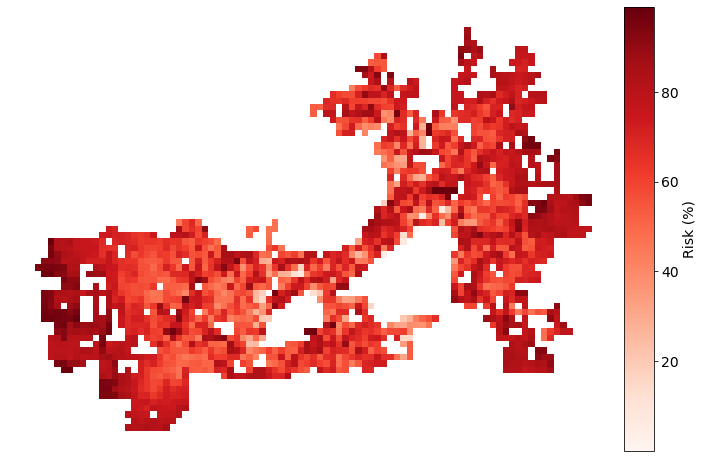

In [22]:
matplotlib.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05,label="Risk")
g.plot(column="Predict",cmap="Reds",ax=ax,legend=True,cax=cax,legend_kwds={'label': "Risk (%)"})
ax.axis("off")
plt.tight_layout()

plt.savefig('riskmap.pdf',format='pdf')

In [16]:
df=m[["geometry","Material","InstallYea"]]
df["index"]=df.index
df=df[df["InstallYea"]>1800.0]
di=df[df["Material"]=="DI"]
ci=df[df["Material"]=="CI"]
sand=df[df["Material"]=="SAND"]
spun=df[df["Material"]=="SPUN"]

/home/gautam/.local/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [17]:
di=di.groupby(by='index').agg({'InstallYea': 'mean','geometry':'first','Material':'first'}).reset_index()
di=geopandas.GeoDataFrame(di)
di

,index,InstallYea,geometry,Material
0,198,2011.000000,"POLYGON ((838000.000 519000.000, 839000.000 51...",DI
1,308,2012.391304,"POLYGON ((838000.000 518000.000, 839000.000 51...",DI
2,418,2009.333333,"POLYGON ((838000.000 517000.000, 839000.000 51...",DI
3,419,2006.000000,"POLYGON ((839000.000 517000.000, 840000.000 51...",DI
4,527,2016.800000,"POLYGON ((837000.000 516000.000, 838000.000 51...",DI
...,...,...,...,...
1778,6967,2003.531250,"POLYGON ((787000.000 457000.000, 788000.000 45...",DI
1779,6968,2005.586207,"POLYGON ((788000.000 457000.000, 789000.000 45...",DI
1780,6969,2003.818182,"POLYGON ((789000.000 457000.000, 790000.000 45...",DI
1781,6970,2001.913043,"POLYGON ((790000.000 457000.000, 791000.000 45...",DI


In [18]:
ci=ci.groupby(by='index').agg({'InstallYea': 'mean','geometry':'first','Material':'first'}).reset_index()
ci=geopandas.GeoDataFrame(ci)
ci

,index,InstallYea,geometry,Material
0,841,1968.0,"POLYGON ((821000.000 513000.000, 822000.000 51...",CI
1,843,1966.0,"POLYGON ((823000.000 513000.000, 824000.000 51...",CI
2,844,1966.0,"POLYGON ((824000.000 513000.000, 825000.000 51...",CI
3,951,1968.0,"POLYGON ((821000.000 512000.000, 822000.000 51...",CI
4,952,1968.0,"POLYGON ((822000.000 512000.000, 823000.000 51...",CI
...,...,...,...,...
658,6100,1963.0,"POLYGON ((800000.000 465000.000, 801000.000 46...",CI
659,6101,1963.0,"POLYGON ((801000.000 465000.000, 802000.000 46...",CI
660,6108,1965.0,"POLYGON ((808000.000 465000.000, 809000.000 46...",CI
661,6109,1965.0,"POLYGON ((809000.000 465000.000, 810000.000 46...",CI


In [19]:
sand=sand.groupby(by='index').agg({'InstallYea': 'mean','geometry':'first','Material':'first'}).reset_index()
sand=geopandas.GeoDataFrame(sand)
sand

,index,InstallYea,geometry,Material
0,1614,1941.00,"POLYGON ((824000.000 506000.000, 825000.000 50...",SAND
1,1615,1940.50,"POLYGON ((825000.000 506000.000, 826000.000 50...",SAND
2,1616,1940.00,"POLYGON ((826000.000 506000.000, 827000.000 50...",SAND
3,1724,1935.00,"POLYGON ((824000.000 505000.000, 825000.000 50...",SAND
4,1725,1936.20,"POLYGON ((825000.000 505000.000, 826000.000 50...",SAND
...,...,...,...,...
307,5555,1937.75,"POLYGON ((805000.000 470000.000, 806000.000 47...",SAND
308,5578,1934.00,"POLYGON ((828000.000 470000.000, 829000.000 47...",SAND
309,5664,1939.75,"POLYGON ((804000.000 469000.000, 805000.000 46...",SAND
310,5665,1945.00,"POLYGON ((805000.000 469000.000, 806000.000 46...",SAND


In [20]:
spun=spun.groupby(by='index').agg({'InstallYea': 'mean','geometry':'first','Material':'first'}).reset_index()
spun=geopandas.GeoDataFrame(spun)
spun

,index,InstallYea,geometry,Material
0,1070,1950.000000,"POLYGON ((830000.000 511000.000, 831000.000 51...",SPUN
1,1500,1953.000000,"POLYGON ((820000.000 507000.000, 821000.000 50...",SPUN
2,1501,1953.250000,"POLYGON ((821000.000 507000.000, 822000.000 50...",SPUN
3,1502,1953.000000,"POLYGON ((822000.000 507000.000, 823000.000 50...",SPUN
4,1504,1951.285714,"POLYGON ((824000.000 507000.000, 825000.000 50...",SPUN
...,...,...,...,...
352,5665,1947.461538,"POLYGON ((805000.000 469000.000, 806000.000 46...",SPUN
353,5772,1952.166667,"POLYGON ((802000.000 468000.000, 803000.000 46...",SPUN
354,5773,1951.842105,"POLYGON ((803000.000 468000.000, 804000.000 46...",SPUN
355,5774,1951.384615,"POLYGON ((804000.000 468000.000, 805000.000 46...",SPUN


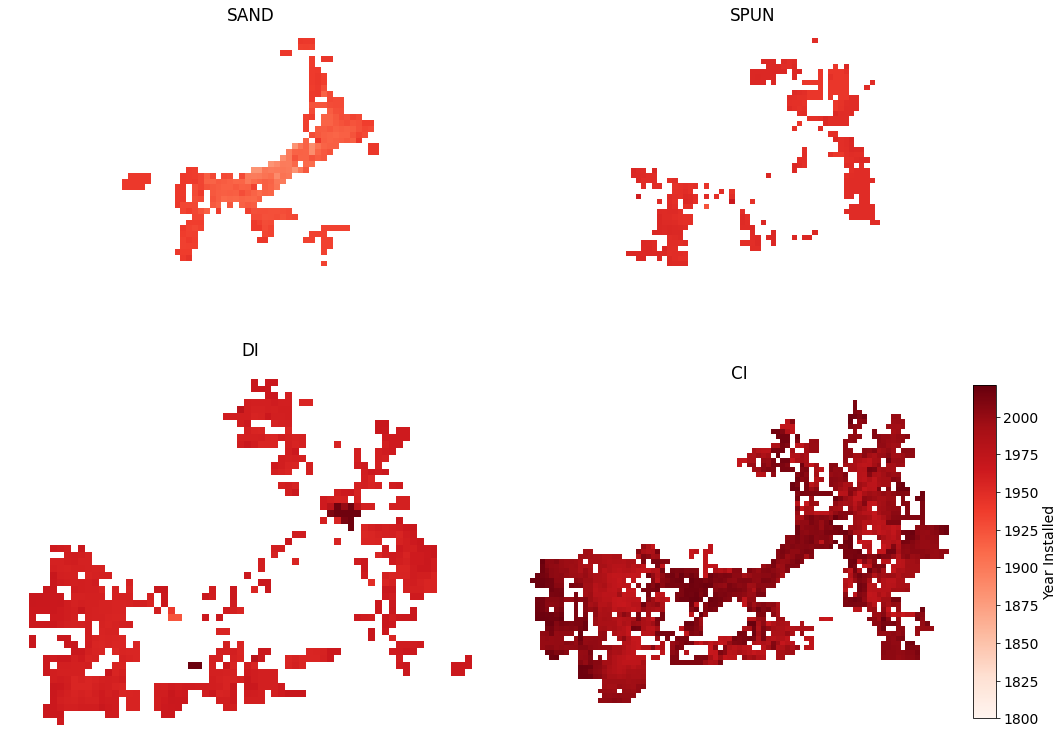

In [21]:
from matplotlib import colors

matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)
cx = fig.add_subplot(421)
dx = fig.add_subplot(422)

divider = make_axes_locatable(bx)
cax = divider.append_axes("right", size="5%", pad=0.05,label="Risk")

ci.plot(column="InstallYea",ax=ax,label="CI",cmap='Reds',vmin=1800,vmax=2021)
di.plot(column="InstallYea",ax=bx,label="DI",cmap='Reds',vmin=1800,vmax=2021,legend=True,cax=cax,legend_kwds={'label': "Year Installed"})
sand.plot(column="InstallYea",ax=cx,label="SAND",cmap='Reds',vmin=1800,vmax=2021)
spun.plot(column="InstallYea",ax=dx,label="SPUN",cmap='Reds',vmin=1800,vmax=2021)

ax.axis("off")
ax.set_title("DI")
bx.axis("off")
bx.set_title("CI")
cx.axis("off")
cx.set_title("SAND")
dx.axis("off")
dx.set_title("SPUN")

plt.tight_layout()

fig.show()